# $\Phi$-SO demo : SR quick start

## SR definition

Symbolic regression (SR) consists in the inference of a free-form symbolic analytical function $f: \mathbb{R}^n \longrightarrow \mathbb{R}$ that fits $y = f(x_0,..., x_n)$ given $(x_0,..., x_n, y)$ data.

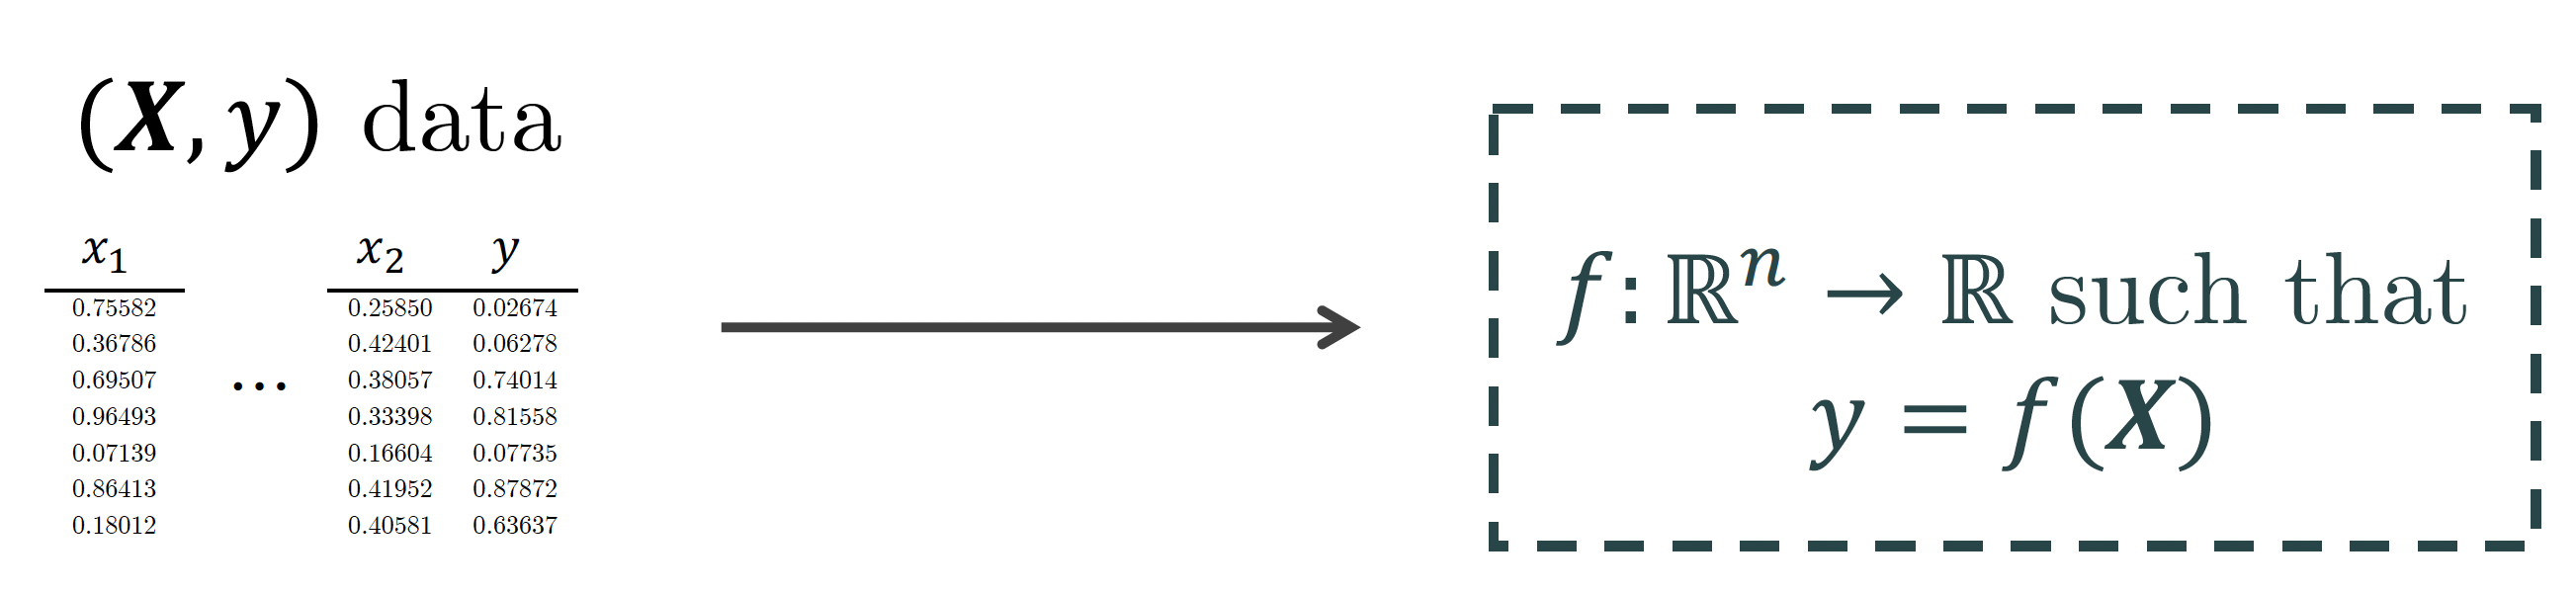

In [1]:
# External packages
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
# Internal code import
import physo
import physo.learn.monitoring as monitoring

Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.

Multiprocessing start method : spawn
Running from notebook : True
Is CUDA available : False
Total nb. of CPUs :  8
Recommended config {'parallel_mode': False, 'n_cpus': 8}
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run phys

/Users/wtenachi/Documents/ASTRO_research/projects/AI_physicist/my_AI_physicist/PhySO/PhySO/physo/physym/batch_execute.py:81: UserWarning: Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
  warnings.warn(msg)
/Users/wtenachi/Documents/ASTRO_research/projects/AI_physicist/my_AI_physicist/PhySO/PhySO/physo/physym/reward.py:252: UserWarning: Parallel mode is not available on this system, switching to non parallel mode.
  warnings.warn("Parallel mode is not available on this system, switching to non parallel mode.")


## Fixing seed

In [3]:
# Seed
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

## Dataset

In [4]:
# Making toy synthetic data
z = np.random.uniform(-10, 10, 50)
v = np.random.uniform(-10, 10, 50)
X = np.stack((z, v), axis=0)
y = 1.234*9.807*z + 1.234*v**2

It should be noted that free constants search starts around 1. by default. Therefore when using default hyperparameters, normalizing the data around an order of magnitude of 1 is strongly recommended.

__DA side note__:  
$\Phi$-SO can exploit DA (dimensional analysis) to make SR more efficient.  
On can consider the physical units of $X=(z,v)$, $z$ being a length of dimension $L^{1}, T^{0}, M^{0}$, v a velocity of dimension $L^{1}, T^{-1}, M^{0}$, $y=E$ if an energy of dimension $L^{2}, T^{-2}, M^{1}$.


Dataset plot

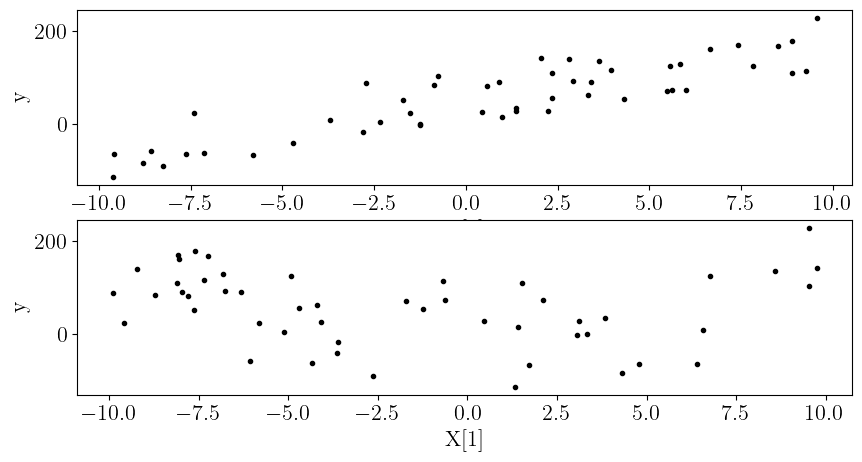

In [5]:
n_dim = X.shape[0]
fig, ax = plt.subplots(n_dim, 1, figsize=(10,5))
for i in range (n_dim):
    curr_ax = ax if n_dim==1 else ax[i]
    curr_ax.plot(X[i], y, 'k.',)
    curr_ax.set_xlabel("X[%i]"%(i))
    curr_ax.set_ylabel("y")
plt.show()

## Running SR task

### Available configurations

It should be noted that SR capabilities of `physo` are heavily dependent on hyperparameters, it is therefore recommended to tune hyperparameters to your own specific problem for doing science.  
Summary of currently available hyperparameters presets configurations:

|  Config    |            Recommended usecases                           |    Speed    |   Effectiveness   |                           Notes                                |
|:----------:|:---------------------------------------------------------:|:-----------:|:-----------------:|:--------------------------------------------------------------:|
| `config0`  | Demos                                                     |     ★★★     |          ★        | Light and fast config.                                         |
| `config1`  | SR with DA$^*$ ;  Class SR with DA$^*$                    |       ★     |        ★★★        | Config used for Feynman Benchmark and MW streams Benchmark.    |
| `config2`  | SR ; Class SR                                             |      ★★     |         ★★        | Config used for Class Benchmark.                               |

$^*$DA = Dimensional Analysis

Users are encouraged to edit configurations (they can be found in: [physo/config/](https://github.com/WassimTenachi/PhySO/tree/main/physo/config)).  
By default, `config0` is used, however it is recommended to follow the upper recommendations for doing science.

__DA side note__:   
1. During the first tens of iterations, the neural network is typically still learning the rules of dimensional analysis, resulting in most candidates being discarded and not learned on, effectively resulting in a much smaller batch size (typically 10x smaller), thus making the evaluation process much less computationally expensive. It is therefore recommended to compensate this behavior by using a higher batch size configuration which helps provide the neural network sufficient learning information.

### Logging config

In [6]:
save_path_training_curves = 'demo_curves.png'
save_path_log             = 'demo.log'

run_logger     = lambda : monitoring.RunLogger(save_path = save_path_log,
                                                do_save = True)

run_visualiser = lambda : monitoring.RunVisualiser (epoch_refresh_rate = 1,
                                           save_path = save_path_training_curves,
                                           do_show   = False,
                                           do_prints = True,
                                           do_save   = True, )

### Run

Given the units input variables $(x_0,..., x_n)$ (here $(z, v)$ ), the root variable $y$ (here $E$) as well as free and fixed constants, you can run an SR task to recover $f$ via the following command.

__DA side note__:  

Here we are allowing the use of a fixed constant $1$ of dimension $L^{0}, T^{0}, M^{0}$ (ie dimensionless) and free constants $m$ of dimension $L^{0}, T^{0}, M^{1}$ and $g$ of dimension $L^{1}, T^{-2}, M^{0}$.

It should be noted that here the units vector are of size 3 (eg: `[1, 0, 0]`) as in this example the variables have units dependent on length, time and mass only.
However, units vectors can be of any size $\leq 7$ as long as it is consistent across X, y and constants, allowing the user to express any units (dependent on length, time, mass, temperature, electric current, amount of light, or amount of matter). 
In addition, dimensional analysis can be performed regardless of the order in which units are given, allowing the user to use any convention ([length, mass, time] or [mass, time, length] etc.) as long as it is consistent across X,y and constants.

Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
SR task started...


/Users/wtenachi/Documents/ASTRO_research/projects/AI_physicist/my_AI_physicist/PhySO/PhySO/physo/physym/batch_execute.py:81: UserWarning: Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
  warnings.warn(msg)


=========== Epoch 00000 ===========
-> Time 1.57 s

Overall best  at R=0.579454
-> Raw expression : 
    ⎛         0.5⎞
v⋅z⋅⎝g + (g⋅g)   ⎠
──────────────────
       ⎛v⎞        
       ⎜─⎟        
       ⎝m⎠        

Best of epoch at R=0.579454
-> Raw expression : 
    ⎛         0.5⎞
v⋅z⋅⎝g + (g⋅g)   ⎠
──────────────────
       ⎛v⎞        
       ⎜─⎟        
       ⎝m⎠        


=========== Epoch 00001 ===========
-> Time 2.05 s

Overall best  at R=0.579454
-> Raw expression : 
     ⎛-    1     1     ⎞
m⋅cos⎜ 1⋅──────⋅───⋅1.0⎟
     ⎜      0.5 1.0    ⎟
     ⎝   1.0           ⎠
────────────────────────
         ⎛ 1 ⎞          
         ⎜───⎟          
         ⎝g⋅z⎠          

Best of epoch at R=0.579454
-> Raw expression : 
     ⎛-    1     1     ⎞
m⋅cos⎜ 1⋅──────⋅───⋅1.0⎟
     ⎜      0.5 1.0    ⎟
     ⎝   1.0           ⎠
────────────────────────
         ⎛ 1 ⎞          
         ⎜───⎟          
         ⎝g⋅z⎠          


=========== Epoch 00002 ===========
-> Time 2.03 s

Overall best  

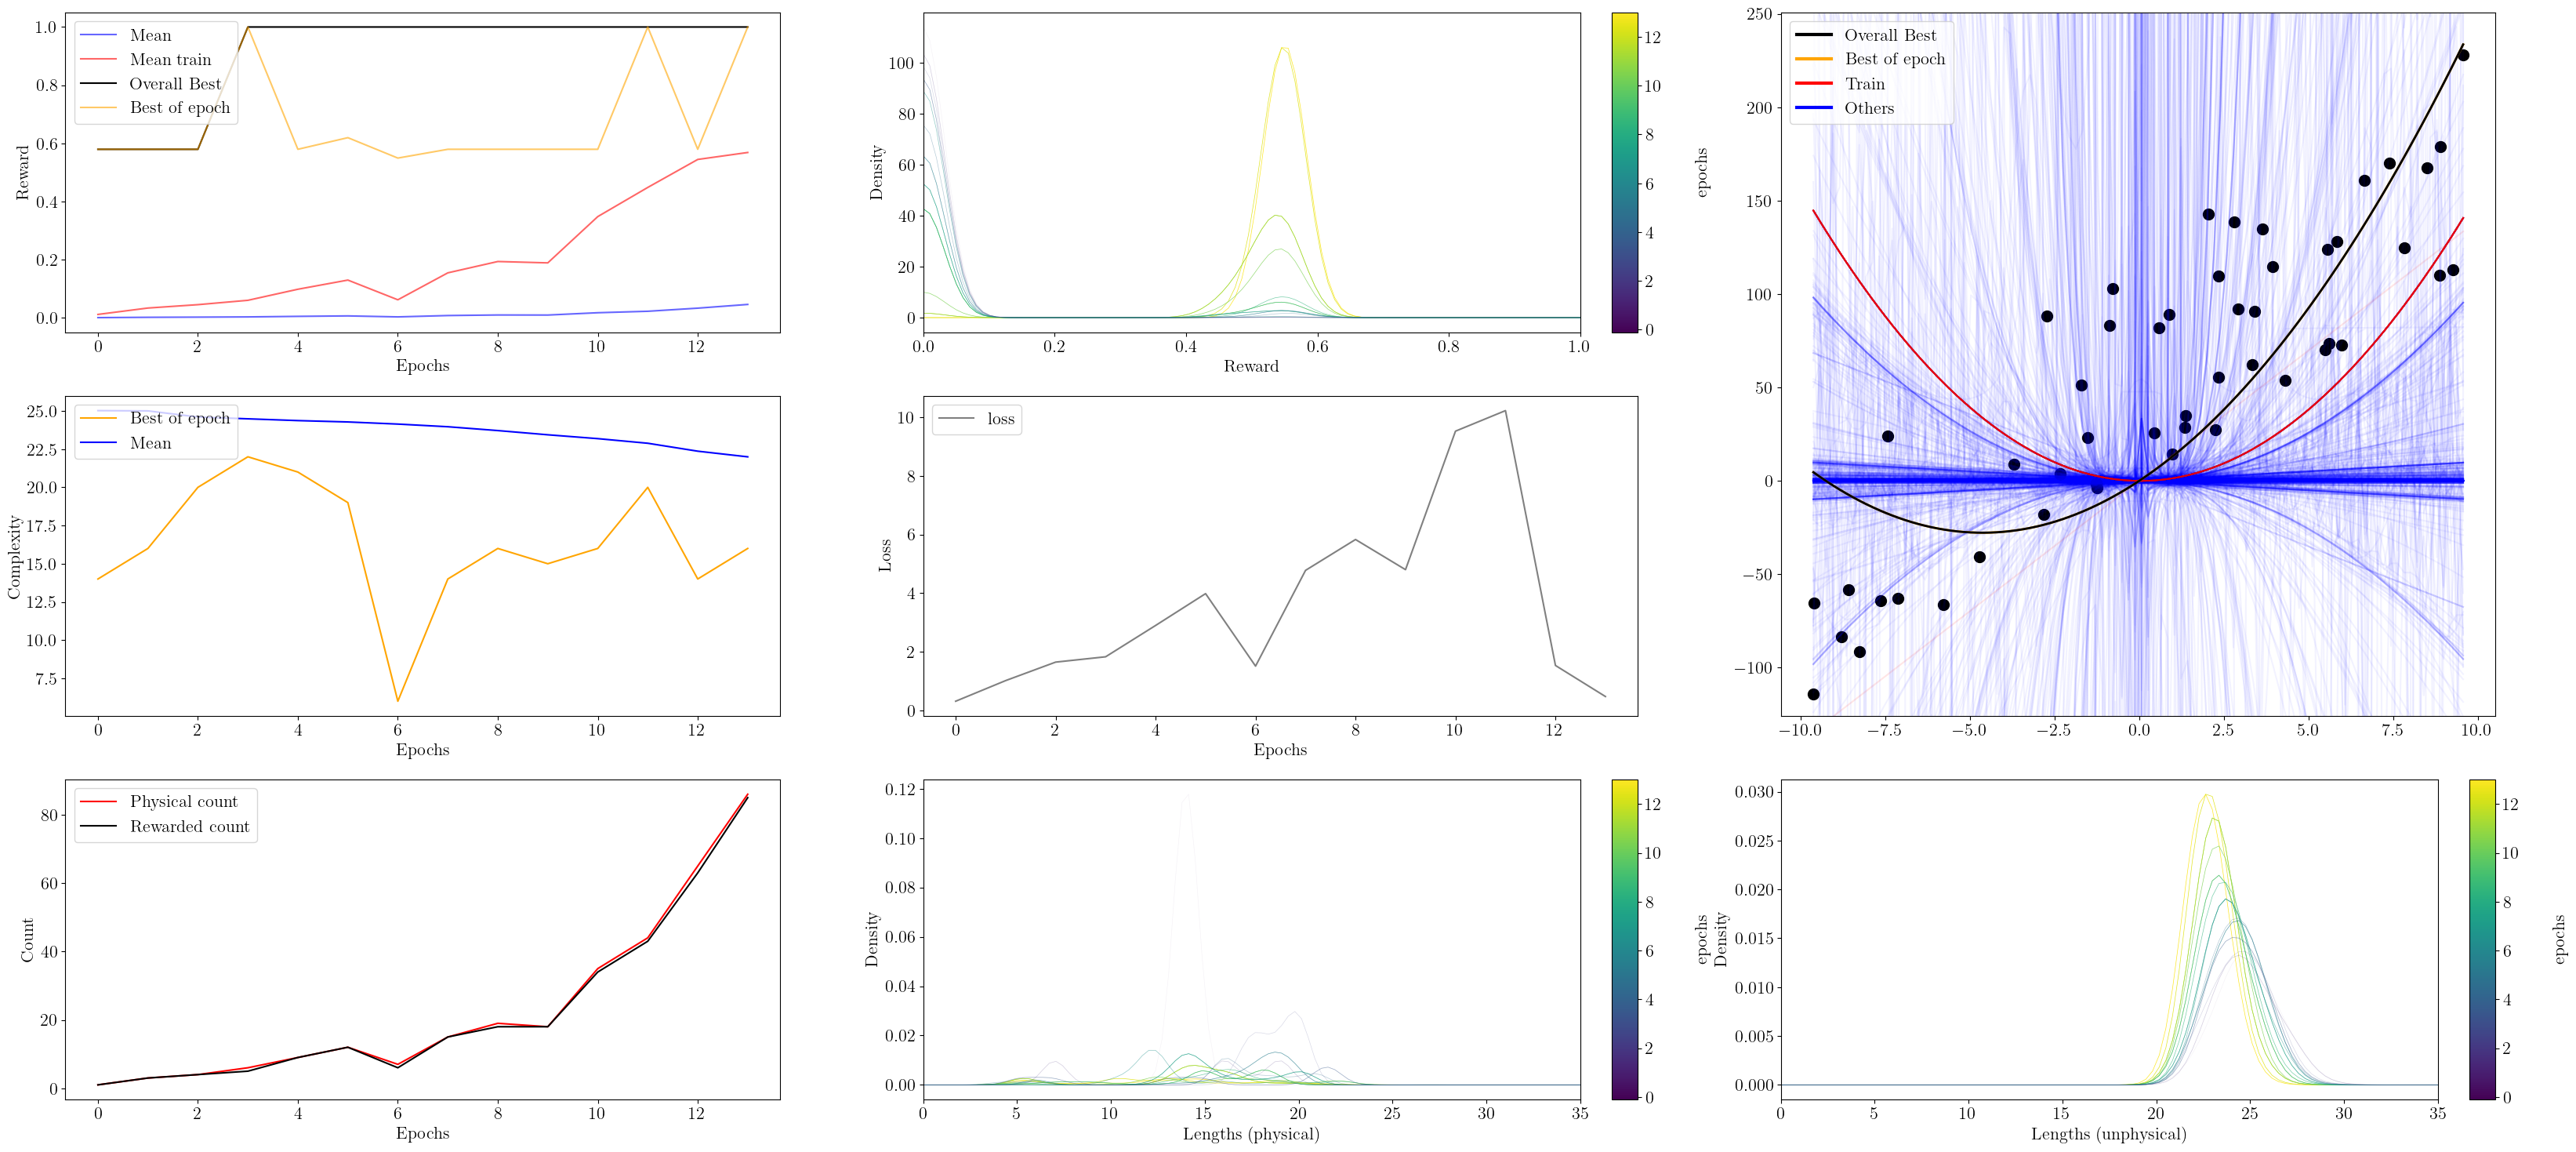

In [7]:
# Running SR task
expression, logs = physo.SR(X, y,
                            # Giving names of variables (for display purposes)
                            X_names = [ "z"       , "v"        ],
                            # Associated physical units (ignore or pass zeroes if irrelevant)
                            X_units = [ [1, 0, 0] , [1, -1, 0] ],
                            # Giving name of root variable (for display purposes)
                            y_name  = "E",
                            y_units = [2, -2, 1],
                            # Fixed constants
                            fixed_consts       = [ 1.      ],
                            fixed_consts_units = [ [0,0,0] ],
                            # Free constants names (for display purposes)
                            free_consts_names = [ "m"       , "g"        ],
                            free_consts_units = [ [0, 0, 1] , [1, -2, 0] ],
                            # Symbolic operations that can be used to make f
                            op_names = ["mul", "add", "sub", "div", "inv", "n2", "sqrt", "neg", "exp", "log", "sin", "cos"],
                            get_run_logger     = run_logger,
                            get_run_visualiser = run_visualiser,
                            # Run config
                            run_config = physo.config.config0.config0,
                            # Parallel mode (only available when running from python scripts, not notebooks)
                            parallel_mode = False,
                            # Number of iterations
                            epochs = 20

)

## Inspecting best expression found

### Getting best expression 

The best expression found (in accuracy) is returned in `expression`:

In [8]:
best_expr = expression
print(best_expr.get_infix_pretty())

     g            
- ─────── + -m⋅v⋅v
  ⎛  v  ⎞         
  ⎜─────⎟         
  ⎝m⋅v⋅z⎠         


It can also be loaded later on from log files:

In [9]:
import physo
from physo.benchmark.utils import symbolic_utils as su
import sympy

# Loading pareto front expressions
pareto_expressions = physo.read_pareto_pkl("demo_curves_pareto.pkl")
# Most accurate expression is the last in the Pareto front:
best_expr = pareto_expressions[-1]
print(best_expr.get_infix_pretty())

     g            
- ─────── + -m⋅v⋅v
  ⎛  v  ⎞         
  ⎜─────⎟         
  ⎝m⋅v⋅z⎠         


### Display

The expression can be converted into...  
A sympy expression:

In [10]:
best_expr.get_infix_sympy()

-g/(v/((m*v*z))) + (-m)*v*v

A sympy expression (with evaluated free constants values):

In [11]:
best_expr.get_infix_sympy(evaluate_consts=True)[0]

1.23399999589876*v**2 + 12.1018379296519*z

A latex string:

In [12]:
best_expr.get_infix_latex()

'm \\left(- g z - v^{2}\\right)'

A latex string (with evaluated free constants values):

In [13]:
sympy.latex(best_expr.get_infix_sympy(evaluate_consts=True))

'\\mathtt{\\text{[1.23399999589876*v**2 + 12.1018379296519*z]}}'

### Getting free constant values

Free constants

In [14]:
best_expr.free_consts

FreeConstantsTable
 -> Class consts (['g' 'm']) : (1, 2)
 -> Spe consts   ([]) : (1, 0, 1)

In [15]:
best_expr.free_consts.class_values

tensor([[ 9.8070, -1.2340]], dtype=torch.float64)

### Checking exact symbolic recovery

In [16]:
# To sympy
best_expr = best_expr.get_infix_sympy(evaluate_consts=True)

best_expr = best_expr[0]

# Printing best expression simplified and with rounded constants
print("best_expr : ", su.clean_sympy_expr(best_expr, round_decimal = 4))

# Target expression was:
target_expr = sympy.parse_expr("1.234*9.807*z + 1.234*v**2")
print("target_expr : ", su.clean_sympy_expr(target_expr, round_decimal = 4))

# Check equivalence
print("\nChecking equivalence:")
is_equivalent, log = su.compare_expression(
                        trial_expr  = best_expr,
                        target_expr = target_expr,
                        handle_trigo            = True,
                        prevent_zero_frac       = True,
                        prevent_inf_equivalence = True,
                        verbose                 = True,
)
print("Is equivalent:", is_equivalent)

best_expr :  1.234*v**2 + 12.1018*z
target_expr :  1.234*v**2 + 12.1018*z

Checking equivalence:
  -> Assessing if 1.234*v**2 + 12.101838*z (target) is equivalent to 1.23399999589876*v**2 + 12.1018379296519*z (trial)
   -> Simplified expression : 1.23*v**2 + 12.1*z
   -> Symbolic error        : 0
   -> Symbolic fraction     : 1
   -> Trigo symbolic error        : 0
   -> Trigo symbolic fraction     : 1
   -> Equivalent : True
Is equivalent: True
